<a href="https://colab.research.google.com/github/ACVBdeveloper/PROJETO-IA-PROGRAMACAO/blob/main/PROJETO_IA_PROGRAMACAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fcast = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_ocorrencia/CSV/numeros_gigantes.csv', encoding="ISO-8859-1", sep = ';')


In [ ]:
fcast['Dados'] = fcast['Dados'].apply(lambda x: str(x).replace(",","."))

In [ ]:
fcast['Dados'] = fcast['Dados'].astype('float64')

In [ ]:
fcast['Anos'] = pd.to_datetime(fcast.Anos)

In [ ]:
fcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Anos    49 non-null     datetime64[ns]
 1   Dados   49 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 912.0 bytes


In [ ]:
#fcast.set_index('Anos')

# **Importação de Bibliotecas e Leitura dos Datasets**

In [ ]:
import pandas as pd
import numpy as np
import datetime #Módulo Datetime fornece as classes para manipulação de datas e horas.
import plotly.express as px #Plotly - Biblioteca para visualização de gráficos interativos python.
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#Montando o seu drive dentro do pandas.
#Clique no link que aparecer e entre com a sua conta. Ele vai te dar um código para ser colado no espaço vazio. Dê "enter".
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#dataframes "Acidentes agrupados por Pessoa"
apessoa2016 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_pessoa/CSV/acidentes2016_data_corrigida.csv', encoding="ISO-8859-1", sep=';')
apessoa2017 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_pessoa/CSV/acidentes2017.csv', encoding="ISO-8859-1", sep=';')
apessoa2018 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_pessoa/CSV/acidentes2018.csv', encoding="ISO-8859-1", sep=';')
apessoa2019 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_pessoa/CSV/acidentes2019.csv', encoding="ISO-8859-1", sep=';')
apessoa2020 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_pessoa/CSV/acidentes2020.csv', encoding="ISO-8859-1", sep=';')

FileNotFoundError: ignored

In [ ]:
#dataframes "Acidentes agrupados por Ocorrência"
datatran2016 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_ocorrencia/CSV/datatran2016_data_corrigida.csv', encoding="ISO-8859-1", sep=';')
datatran2017 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_ocorrencia/CSV/datatran2017.csv', encoding="ISO-8859-1", sep=';')
datatran2018 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_ocorrencia/CSV/datatran2018.csv', encoding="ISO-8859-1", sep=';')
datatran2019 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_ocorrencia/CSV/datatran2019.csv', encoding="ISO-8859-1", sep=';')
datatran2020 = pd.read_csv('/content/drive/MyDrive/IA-DF-CSV-XLSX/Acidentes_por_ocorrencia/CSV/datatran2020.csv', encoding="ISO-8859-1", sep=';')

# **Tratamento e Exploração dos Dados**

#### **Tratando os dados de Acidentes por Ocorrência - Datatran**

In [ ]:
#Concatenação de todas as ocorrências por ano.
datatran_total = pd.concat([datatran2016, datatran2017, datatran2018, datatran2019, datatran2020])

NameError: ignored

In [ ]:
#Isolando as BRS 381 e 262 - MG
x = (datatran_total.uf == 'MG') & (datatran_total.br == 381)
y = (datatran_total.uf == 'MG') & (datatran_total.br == 262)
datatran_381 = datatran_total[x]
datatran_381['CONTAGEM'] = 1 #Adicionando coluna para contagem
datatran_262 = datatran_total[y]
datatran_262['CONTAGEM'] = 1 #Adicionando coluna para contagem

In [ ]:
datatran_381.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,latitude,longitude,regional,delegacia,uop,CONTAGEM
33,83425918.0,01/01/16,Sexta,08:30:00,MG,381.0,563,ITAGUARA,Velocidade incompatível,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Ceu Claro,Dupla,Curva,Urbano,2,0,0,0,2,0,0,2,2016,NaN,NaN,NaN,NaN,NaN,1
73,83425990.0,01/01/16,Sexta,14:30:00,MG,381.0,878,ESTIVA,Velocidade incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Dupla,Reta,Rural,4,0,4,0,0,0,4,1,2016,NaN,NaN,NaN,NaN,NaN,1
102,83426027.0,01/01/16,Sexta,16:30:00,MG,381.0,913,CAMANDUCAIA,Velocidade incompatível,Capotamento,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Dupla,Curva,Rural,1,0,1,0,0,0,1,1,2016,NaN,NaN,NaN,NaN,NaN,1
133,83426071.0,01/01/16,Sexta,05:30:00,MG,381.0,"406,1",BOM JESUS DO AMPARO,Outras,Saída de Pista,Com Vítimas Feridas,Amanhecer,Crescente,Chuva,Simples,Curva,Rural,2,0,1,0,1,0,1,1,2016,NaN,NaN,NaN,NaN,NaN,1
140,83426083.0,01/01/16,Sexta,21:15:00,MG,381.0,845,SAO SEBASTIAO DA BELA VISTA,Velocidade incompatível,Saída de Pista,Sem Vítimas,Plena noite,Crescente,Chuva,Dupla,Reta,Rural,1,0,0,0,1,0,0,1,2016,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
datatran_262.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,latitude,longitude,regional,delegacia,uop,CONTAGEM
30,83425902.0,01/01/16,Sexta,07:30:00,MG,262.0,"159,9",SAO DOMINGOS DO PRATA,Velocidade incompatível,Saída de Pista,Com Vítimas Feridas,Pleno dia,Decrescente,Ceu Claro,Simples,Curva,Rural,2,0,1,0,1,0,1,1,2016,NaN,NaN,NaN,NaN,NaN,1
82,83425999.0,01/01/16,Sexta,08:30:00,MG,262.0,402,PARA DE MINAS,Dormindo,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Sol,Dupla,Reta,Rural,1,0,1,0,0,0,1,1,2016,NaN,NaN,NaN,NaN,NaN,1
130,83426066.0,01/01/16,Sexta,17:40:00,MG,262.0,878,CAMPO FLORIDO,Falta de atenção,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Cruzamento,Urbano,2,0,1,0,0,1,1,2,2016,NaN,NaN,NaN,NaN,NaN,1
280,83426288.0,02/01/16,Sábado,15:42:00,MG,262.0,381,JUATUBA,Ingestão de álcool,Saída de Pista,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Dupla,Curva,Rural,4,0,2,0,2,0,2,1,2016,NaN,NaN,NaN,NaN,NaN,1
399,83426429.0,02/01/16,Sábado,22:40:00,MG,262.0,615,IBIA,Ultrapassagem indevida,Saída de Pista,Com Vítimas Feridas,Plena noite,Decrescente,Nublado,Simples,Reta,Rural,1,0,1,0,0,0,1,1,2016,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
#O ano de 2016 não possui as colunas de "latitude, longitude, regional, delegacia e uop", por isso aparecem tantos resultados.
datatran_381.isnull().sum()

id                           0
data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                           0
km                           0
municipio                    0
causa_acidente               0
tipo_acidente                0
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       1
tipo_pista                   0
tracado_via                  0
uso_solo                     0
pessoas                      0
mortos                       0
feridos_leves                0
feridos_graves               0
ilesos                       0
ignorados                    0
feridos                      0
veiculos                     0
ano                          0
latitude                  4616
longitude                 4616
regional                  4616
delegacia                 4616
uop                       4634
CONTAGEM                     0
dtype: i

In [ ]:
#Coletando a condicao metereologica mais frequente.
print(datatran_381.condicao_metereologica.value_counts())
freq = datatran_381.condicao_metereologica.value_counts()[0]

Céu Claro           5871
Chuva               4135
Nublado             2853
Ceu Claro           1849
Sol                 1431
Garoa/Chuvisco       289
Ignorado             221
Ignorada             121
Nevoeiro/Neblina      92
Nevoeiro/neblina      34
Vento                  8
Granizo                2
Name: condicao_metereologica, dtype: int64


In [ ]:
#Substituindo o local onde o valor era nulo com o mais frequente.
datatran_381.condicao_metereologica.fillna(freq, inplace=True)

In [ ]:
#Verificando se ele desapareceu.
datatran_381.isnull().sum()

In [ ]:
datatran_262.isnull().sum()

In [ ]:
#Como nesse estudo não usaremos informacoes de "latitude, longitude, regional, delegacia e uop", essas colunas podem ser descartadas.
datatran_381.drop([
                     'latitude',
                     'longitude',
                     'regional',
                     'delegacia',
                     'uop'
                 ], axis=1, inplace=True)
datatran_381

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,CONTAGEM
33,83425918.0,01/01/16,Sexta,08:30:00,MG,381.0,563,ITAGUARA,Velocidade incompatível,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Ceu Claro,Dupla,Curva,Urbano,2,0,0,0,2,0,0,2,2016,1
73,83425990.0,01/01/16,Sexta,14:30:00,MG,381.0,878,ESTIVA,Velocidade incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Dupla,Reta,Rural,4,0,4,0,0,0,4,1,2016,1
102,83426027.0,01/01/16,Sexta,16:30:00,MG,381.0,913,CAMANDUCAIA,Velocidade incompatível,Capotamento,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Dupla,Curva,Rural,1,0,1,0,0,0,1,1,2016,1
133,83426071.0,01/01/16,Sexta,05:30:00,MG,381.0,"406,1",BOM JESUS DO AMPARO,Outras,Saída de Pista,Com Vítimas Feridas,Amanhecer,Crescente,Chuva,Simples,Curva,Rural,2,0,1,0,1,0,1,1,2016,1
140,83426083.0,01/01/16,Sexta,21:15:00,MG,381.0,845,SAO SEBASTIAO DA BELA VISTA,Velocidade incompatível,Saída de Pista,Sem Vítimas,Plena noite,Crescente,Chuva,Dupla,Reta,Rural,1,0,0,0,1,0,0,1,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63184,331582.0,2020-12-31,quinta-feira,08:50:00,MG,381.0,200,PERIQUITO,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,5,0,5,0,0,0,5,2,2020,1
63193,331592.0,2020-12-31,quinta-feira,12:38:00,MG,381.0,372,SAO GONCALO DO RIO ABAIXO,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,1,0,3,0,1,2,2020,1
63260,331664.0,2020-12-31,quinta-feira,21:00:00,MG,381.0,"888,9",CAMBUI,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Curva,Não,1,0,1,0,0,0,1,1,2020,1
63393,333968.0,2020-10-16,sexta-feira,08:30:00,MG,381.0,"371,7",SAO GONCALO DO RIO ABAIXO,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Ignorado,Simples,Curva,Não,1,0,1,0,0,0,1,1,2020,1


In [ ]:
#Como nesse estudo não usaremos informacoes de "latitude, longitude, regional, delegacia e uop", essas colunas podem ser descartadas.
datatran_262.drop([
                     'latitude',
                     'longitude',
                     'regional',
                     'delegacia',
                     'uop'
                 ], axis=1, inplace=True)
datatran_262

NameError: ignored

In [ ]:
#Concatenacao da filtragem de br's
datatran_381_262 = pd.concat([datatran_381, datatran_262])

In [ ]:
datatran_381.CONTAGEM.sum()

16907

In [ ]:
datatran_262.CONTAGEM.sum()

5852

In [ ]:
16907+5852

22759

In [ ]:
#Retorna um resumo estatístico das variáveis numéricas.
datatran_381_262.describe()

NameError: ignored

In [ ]:
#Verificando se há duplicatas no dataframe.
duplicados = datatran_381_262[datatran_381_262.duplicated(keep='first')]
print(duplicados)

NameError: ignored

In [ ]:
#Retorna um resumo dos valores "não nulos" encontrados e os datatypes de cara coluna.
datatran_381_262.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22759 entries, 33 to 63259
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22759 non-null  float64
 1   data_inversa            22759 non-null  object 
 2   dia_semana              22759 non-null  object 
 3   horario                 22759 non-null  object 
 4   uf                      22759 non-null  object 
 5   br                      22759 non-null  float64
 6   km                      22759 non-null  object 
 7   municipio               22759 non-null  object 
 8   causa_acidente          22759 non-null  object 
 9   tipo_acidente           22759 non-null  object 
 10  classificacao_acidente  22759 non-null  object 
 11  fase_dia                22759 non-null  object 
 12  sentido_via             22759 non-null  object 
 13  condicao_metereologica  22759 non-null  object 
 14  tipo_pista              22759 non-nul

In [ ]:
datatran_381_262.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,CONTAGEM
33,83425918.0,01/01/16,Sexta,08:30:00,MG,381.0,563,ITAGUARA,Velocidade incompatível,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Ceu Claro,Dupla,Curva,Urbano,2,0,0,0,2,0,0,2,2016,1
73,83425990.0,01/01/16,Sexta,14:30:00,MG,381.0,878,ESTIVA,Velocidade incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Dupla,Reta,Rural,4,0,4,0,0,0,4,1,2016,1
102,83426027.0,01/01/16,Sexta,16:30:00,MG,381.0,913,CAMANDUCAIA,Velocidade incompatível,Capotamento,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Dupla,Curva,Rural,1,0,1,0,0,0,1,1,2016,1
133,83426071.0,01/01/16,Sexta,05:30:00,MG,381.0,"406,1",BOM JESUS DO AMPARO,Outras,Saída de Pista,Com Vítimas Feridas,Amanhecer,Crescente,Chuva,Simples,Curva,Rural,2,0,1,0,1,0,1,1,2016,1
140,83426083.0,01/01/16,Sexta,21:15:00,MG,381.0,845,SAO SEBASTIAO DA BELA VISTA,Velocidade incompatível,Saída de Pista,Sem Vítimas,Plena noite,Crescente,Chuva,Dupla,Reta,Rural,1,0,0,0,1,0,0,1,2016,1


In [ ]:
#Retorna a soma dos valores nulos encontrados.
datatran_381_262.isnull().sum()

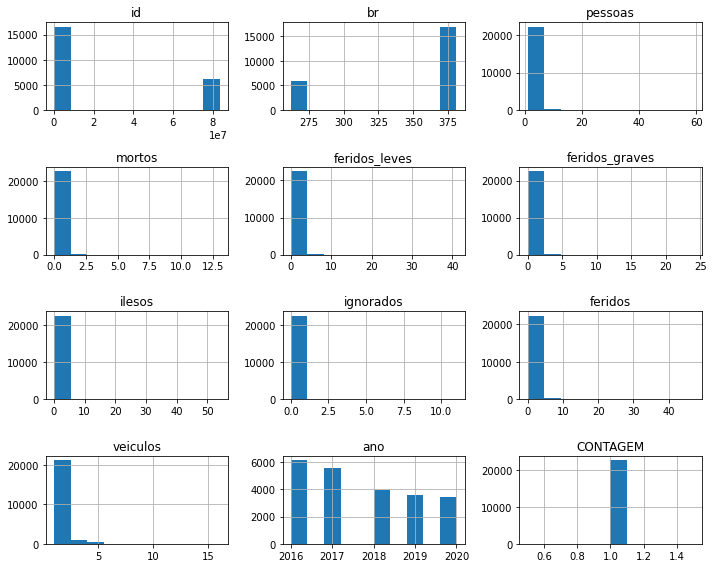

In [ ]:
datatran_381_262.hist(figsize=(10,8));
plt.tight_layout()

falta fazer =====

In [ ]:
datatran_381_262.causa_acidente.value_counts()

In [ ]:
#A partir do ano de 2017, algumas causas de acidente foram renomeadas. Deixando em maiúscula algumas letras, por isso foi necessário fazer a renomeação dessas palavras no dataset de 2016, para evitar duplicatas.
datatran_381_262 = datatran_381_262.replace({'Velocidade incompatível': 'Velocidade Incompatível'})
datatran_381_262 = datatran_381_262.replace({'Ingestão de álcool': 'Ingestão de Álcool'})
datatran_381_262 = datatran_381_262.replace({'Defeito mecânico em veículo': 'Defeito Mecânico no Veículo'})
datatran_381_262 = datatran_381_262.replace({'Ultrapassagem indevida': 'Ultrapassagem Indevida'})
datatran_381_262 = datatran_381_262.replace({'Defeito na via': 'Defeito na Via'})
datatran_381_262 = datatran_381_262.replace({'Dormindo': 'Condutor Dormindo'})
datatran_381_262 = datatran_381_262.replace({'Falta de atenção': 'Falta de Atenção à Condução'})
datatran_381_262 = datatran_381_262.replace({'Ausência de sinalização': 'Sinalização da via insuficiente ou inadequada'})
#Coluna "tipo_acidente"
#datatran2016 = datatran2016.replace({'Colisão Transversal': 'Colisão transversal'})
#datatran2016 = datatran2016.replace({'Atropelamento de animal': 'Atropelamento de Animal'})
#datatran2016 = datatran2016.replace({'Derramamento de Carga': 'Derramamento de carga'})
#datatran2016 = datatran2016.replace({'Atropelamento de pessoa': 'Atropelamento de Pedestre'})
#datatran2016 = datatran2016.replace({'Danos Eventuais': 'Danos eventuais'})

Identificando Outliers ==== falta fazer

#### **Trantando os dados de Acidentes por Pessoa**

In [ ]:
#Criando uma nova coluna "ano".
apessoa2016['ano'] = 2016
apessoa2017['ano'] = 2017
apessoa2018['ano'] = 2018
apessoa2019['ano'] = 2019
apessoa2020['ano'] = 2020

In [ ]:
#Concatenação de todos os dataframes de acidentes por pessoa.
apessoa_total = pd.concat([apessoa2016, apessoa2017, apessoa2018, apessoa2019, apessoa2020])

In [ ]:
#Isolando as BRS 381 e 262 - MG
x = (apessoa_total.uf == 'MG') & (apessoa_total.br == 381)
y = (apessoa_total.uf == 'MG') & (apessoa_total.br == 262)
apessoa_381 = apessoa_total[x]
apessoa_381['CONTAGEM'] = 1 #Adicionando coluna para contagem
apessoa_262 = apessoa_total[y]
apessoa_262['CONTAGEM'] = 1 #Adicionando coluna para contagem

In [ ]:
apessoa_381_262 = pd.concat([apessoa_381, apessoa_262])

In [ ]:
apessoa_total

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,nacionalidade,naturalidade,ano,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,83426197.0,83627330.0,01/01/16,Sexta,00:10:00,SP,116.0,212,GUARULHOS,Ingestão de álcool,Colisão frontal,Com Vítimas Fatais,Plena noite,Crescente,Ceu Claro,Múltipla,Reta,Urbano,19016831.0,Automóvel,FIAT/UNO CS IE,1994.0,Condutor,Morto,48.0,M,BRASIL,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83426197.0,83627344.0,01/01/16,Sexta,00:10:00,SP,116.0,212,GUARULHOS,Ingestão de álcool,Colisão frontal,Com Vítimas Fatais,Plena noite,Crescente,Ceu Claro,Múltipla,Reta,Urbano,19016830.0,Camioneta,I/CHEV TRACKER LTZ AT,2015.0,Condutor,Ileso,25.0,M,BOLIVIA,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83426151.0,83627107.0,01/01/16,Sexta,00:30:00,MG,116.0,"366,1",FREI INOCENCIO,Desobediência à sinalização,Colisão frontal,Com Vítimas Feridas,Plena noite,Decrescente,Ceu Claro,Simples,Reta,Rural,19016718.0,Automóvel,VW/VOYAGE 1.6 COMFORTL,2011.0,Condutor,Ileso,51.0,M,BRASIL,FREI INOCENCIO,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83426151.0,83627113.0,01/01/16,Sexta,00:30:00,MG,116.0,"366,1",FREI INOCENCIO,Desobediência à sinalização,Colisão frontal,Com Vítimas Feridas,Plena noite,Decrescente,Ceu Claro,Simples,Reta,Rural,19016721.0,Motocicletas,HONDA/CG 150 TITAN KS,2004.0,Condutor,Ferido Grave,21.0,M,BRASIL,MATHIAS LOBATO,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83426151.0,83627172.0,01/01/16,Sexta,00:30:00,MG,116.0,"366,1",FREI INOCENCIO,Desobediência à sinalização,Colisão frontal,Com Vítimas Feridas,Plena noite,Decrescente,Ceu Claro,Simples,Reta,Rural,19016721.0,Motocicletas,HONDA/CG 150 TITAN KS,2004.0,Passageiro,Ferido Grave,24.0,F,BRASIL,GOVERNADOR VALADARES,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,784912.0,2020-08-15,sÃ¡bado,18:30:00,RS,116.0,"156,6",CAXIAS DO SUL,DesobediÃªncia Ã s normas de trÃ¢nsito pelo co...,ColisÃ£o lateral,Com VÃ­timas Feridas,Anoitecer,Decrescente,CÃ©u Claro,Simples,Curva,NÃ£o,633801.0,AutomÃ³vel,FORD/KA FLEX,2012.0,Condutor,Ileso,58.0,Masculino,NaN,NaN,2020,1.0,0.0,0.0,0.0,"-29,20731013","-51,17757864",SR-RS,UOP01,DEL05
147638,352395.0,785081.0,2020-12-30,quarta,11:00:00,PI,343.0,20,PARNAIBA,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o transversal,Com VÃ­timas Feridas,Pleno dia,Crescente,CÃ©u Claro,Simples,Reta,NÃ£o,633956.0,AutomÃ³vel,I/VW SPACEFOX COMFORT,2008.0,Condutor,LesÃµes Leves,19.0,Masculino,NaN,NaN,2020,0.0,1.0,0.0,0.0,"-2,981128","-41,762501",SR-PI,UOP01,DEL05
147639,352395.0,785080.0,2020-12-30,quarta,11:00:00,PI,343.0,20,PARNAIBA,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o transversal,Com VÃ­timas Feridas,Pleno dia,Crescente,CÃ©u Claro,Simples,Reta,NÃ£o,633955.0,AutomÃ³vel,VW/GOL 1.0,2011.0,Condutor,Ileso,30.0,Masculino,NaN,NaN,2020,1.0,0.0,0.0,0.0,"-2,981128","-41,762501",SR-PI,UOP01,DEL05
147640,352488.0,785255.0,2020-12-31,quinta,08:00:00,MA,135.0,95,ITAPECURU MIRIM,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o lateral,Com VÃ­timas Feridas,Amanhecer,Decrescente,CÃ©u Claro,Simples,InterseÃ§Ã£o de vias,NÃ£o,634129.0,Caminhonete,FIAT/STRADA WORKING CE,2013.0,Condutor,NÃ£o Informado,NaN,NÃ£o Informado,NaN,NaN,2020,0.0,0.0,0.0,0.0,"-3,3279719","-44,44236412",SR-MA,UOP02,DEL01


In [ ]:
apessoa_total.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'nacionalidade',
       'naturalidade', 'ano', 'ilesos', 'feridos_leves', 'feridos_graves',
       'mortos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [ ]:
apessoa_381_262.isnull().sum()

id                            0
pesid                         0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                            0
km                            0
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        3
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                  166
tipo_veiculo                166
marca                      2874
ano_fabricacao_veiculo     1652
tipo_envolvido                0
estado_fisico                 0
idade                      4234
sexo                          0
nacionalidade             38918
naturalidade              46845
ano                           0
ilesos                    12779
feridos_leves             12779
feridos_

In [ ]:
apessoa_381_262.describe()

,id,pesid,br,id_veiculo,ano_fabricacao_veiculo,idade,ano,ilesos,feridos_leves,feridos_graves,mortos,CONTAGEM
count,5.139400e+04,5.139400e+04,51394.000000,5.122800e+04,49742.000000,47160.000000,51394.000000,38615.000000,38615.000000,38615.000000,38615.000000,51394.0
mean,2.088037e+07,2.111303e+07,350.734813,4.924605e+06,2008.330747,40.392345,2017.755263,0.429703,0.404169,0.092192,0.027735,1.0
std,3.601183e+07,3.607075e+07,51.823044,8.105794e+06,7.447631,65.705437,1.407274,0.495040,0.490737,0.289301,0.164216,0.0
min,4.700000e+01,3.800000e+01,262.000000,4.400000e+01,1946.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.047920e+05,2.289278e+05,262.000000,1.860800e+05,2005.000000,27.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.208780e+05,4.908505e+05,381.000000,3.930935e+05,2010.000000,37.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3.315080e+05,7.387868e+05,381.000000,5.932660e+05,2013.000000,48.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,1.0
max,8.352984e+07,8.398793e+07,381.000000,1.918633e+07,2020.000000,2019.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
apessoa_total.drop([
                     'dia_semana',
                     'horario', 
                     'km', 
                     'municipio', 
                     'fase_dia', 
                     'sentido_via', 
                     'condicao_metereologica',
                     'tipo_pista',
                     'tracado_via',
                     'uso_solo',
                     'marca',
                     'ano_fabricacao_veiculo',
                     'tipo_envolvido',
                     'idade',
                     'nacionalidade',
                     'naturalidade',
                     'ilesos',
                     'feridos_leves',
                     'feridos_graves',
                     'mortos',
                     'latitude',
                     'longitude',
                     'regional',
                     'delegacia',
                     'uop'
                 ], axis=1, inplace=True)
apessoa_total

,id,pesid,data_inversa,uf,br,causa_acidente,tipo_acidente,classificacao_acidente,id_veiculo,tipo_veiculo,estado_fisico,sexo,ano
0,83426197.0,83627330.0,01/01/16,SP,116.0,Ingestão de álcool,Colisão frontal,Com Vítimas Fatais,19016831.0,Automóvel,Morto,M,2016
1,83426197.0,83627344.0,01/01/16,SP,116.0,Ingestão de álcool,Colisão frontal,Com Vítimas Fatais,19016830.0,Camioneta,Ileso,M,2016
2,83426151.0,83627107.0,01/01/16,MG,116.0,Desobediência à sinalização,Colisão frontal,Com Vítimas Feridas,19016718.0,Automóvel,Ileso,M,2016
3,83426151.0,83627113.0,01/01/16,MG,116.0,Desobediência à sinalização,Colisão frontal,Com Vítimas Feridas,19016721.0,Motocicletas,Ferido Grave,M,2016
4,83426151.0,83627172.0,01/01/16,MG,116.0,Desobediência à sinalização,Colisão frontal,Com Vítimas Feridas,19016721.0,Motocicletas,Ferido Grave,F,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,784912.0,2020-08-15,RS,116.0,DesobediÃªncia Ã s normas de trÃ¢nsito pelo co...,ColisÃ£o lateral,Com VÃ­timas Feridas,633801.0,AutomÃ³vel,Ileso,Masculino,2020
147638,352395.0,785081.0,2020-12-30,PI,343.0,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o transversal,Com VÃ­timas Feridas,633956.0,AutomÃ³vel,LesÃµes Leves,Masculino,2020
147639,352395.0,785080.0,2020-12-30,PI,343.0,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o transversal,Com VÃ­timas Feridas,633955.0,AutomÃ³vel,Ileso,Masculino,2020
147640,352488.0,785255.0,2020-12-31,MA,135.0,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o lateral,Com VÃ­timas Feridas,634129.0,Caminhonete,NÃ£o Informado,NÃ£o Informado,2020


In [ ]:
#Arrumando alguns nomes
#tipo_veiculo
apessoa_total = apessoa_total.replace({'CaminhÃ£o': 'Caminhão'})
apessoa_total = apessoa_total.replace({'CaminhÃ£o-trator': 'Caminhão-trator'})
apessoa_total = apessoa_total.replace({'Caminhão-Trator': 'Caminhão-trator'})
apessoa_total = apessoa_total.replace({'AutomÃ³vel': 'Automóvel'})
apessoa_total = apessoa_total.replace({'Ãnibus': 'Ônibus'})
apessoa_total = apessoa_total.replace({'UtilitÃ¡rio': 'Utilitário'})
apessoa_total = apessoa_total.replace({'NÃ£o Informado': 'Não Informado'})
apessoa_total = apessoa_total.replace({'Micro-Ã´nibus': 'Micro-ônibus'})
apessoa_total = apessoa_total.replace({'Microônibus': 'Micro-ônibus'})
apessoa_total = apessoa_total.replace({'CarroÃ§a-charrete': 'Carroça-charrete'})
apessoa_total = apessoa_total.replace({'Semi-Reboque': 'Semireboque'})
#estado_fisico
apessoa_total = apessoa_total.replace({'LesÃµes Leves': 'Lesões Leves'})
apessoa_total = apessoa_total.replace({'LesÃµes Graves': 'Lesões Graves'})
apessoa_total = apessoa_total.replace({'NÃ£o Informado': 'Não Informado'})
apessoa_total = apessoa_total.replace({'Ãbito': 'Óbito'})

In [ ]:
#Isolando as BRS 381 e 262 - MG
x = (apessoa_total.uf == 'MG') & (apessoa_total.br == 381)
y = (apessoa_total.uf == 'MG') & (apessoa_total.br == 262)
apessoa_381 = apessoa_total[x]
apessoa_381['CONTAGEM'] = 1 #Adicionando coluna para contagem
apessoa_262 = apessoa_total[y]
apessoa_262['CONTAGEM'] = 1 #Adicionando coluna para contagem
apessoa_381_262 = pd.merge(apessoa_381, apessoa_262, how = 'outer')

In [ ]:
apessoa_381_262

,id,pesid,data_inversa,uf,br,causa_acidente,tipo_acidente,classificacao_acidente,id_veiculo,tipo_veiculo,estado_fisico,sexo,ano,CONTAGEM
0,83427079.0,83630995.0,01/01/16,MG,381.0,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,19018161.0,Utilitário,Ferido Leve,M,2016,1
1,83427079.0,83631013.0,01/01/16,MG,381.0,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,19018232.0,Automóvel,Ferido Leve,M,2016,1
2,83426071.0,83626828.0,01/01/16,MG,381.0,Outras,Saída de Pista,Com Vítimas Feridas,19016602.0,Automóvel,Ileso,M,2016,1
3,83426071.0,83626831.0,01/01/16,MG,381.0,Outras,Saída de Pista,Com Vítimas Feridas,19016602.0,Automóvel,Ferido Leve,M,2016,1
4,83425918.0,83635176.0,01/01/16,MG,381.0,Velocidade incompatível,Colisão traseira,Sem Vítimas,19016356.0,Automóvel,Ileso,M,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51389,345223.0,769032.0,2020-12-17,MG,262.0,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o transversal,Com VÃ­timas Feridas,620191.0,Bicicleta,Lesões Graves,Masculino,2020,1
51390,345223.0,769031.0,2020-12-17,MG,262.0,Falta de AtenÃ§Ã£o Ã ConduÃ§Ã£o,ColisÃ£o transversal,Com VÃ­timas Feridas,620190.0,Caminhonete,Lesões Leves,Masculino,2020,1
51391,350237.0,780269.0,2020-09-26,MG,262.0,DesobediÃªncia Ã s normas de trÃ¢nsito pelo co...,ColisÃ£o frontal,Com VÃ­timas Feridas,629883.0,Motocicleta,Lesões Graves,Feminino,2020,1
51392,350237.0,780268.0,2020-09-26,MG,262.0,DesobediÃªncia Ã s normas de trÃ¢nsito pelo co...,ColisÃ£o frontal,Com VÃ­timas Feridas,629883.0,Motocicleta,Lesões Graves,Masculino,2020,1


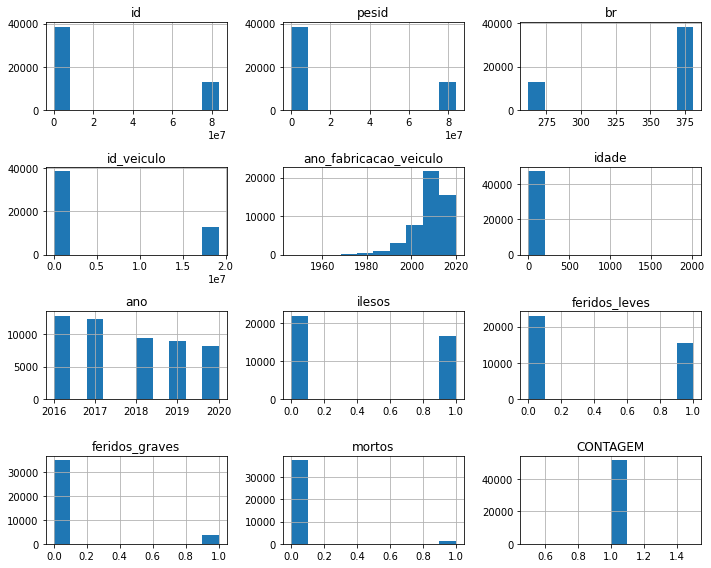

In [ ]:
apessoa_381_262.hist(figsize=(10,8));
plt.tight_layout()

# **Questionário**

### **Questão 1 - Quais são as causas presumíveis de ocorrências?**

In [ ]:
for causa_acidente in datatran_381_262['causa_acidente'].unique():
  print(causa_acidente)

In [ ]:
datatran_381_262['causa_acidente'].value_counts().rename_axis('Causa Acidente').reset_index(name='Quantidade')

In [ ]:
df = datatran_381_262

In [ ]:
df = df.groupby(['causa_acidente'], as_index=False)[['mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'CONTAGEM']].sum()

In [ ]:
df = df.rename_axis('causa_acidente_id').reset_index()

In [ ]:
df

In [ ]:
correlation = df.corr()

In [ ]:
# plot da matriz de correlação

plt.figure(figsize=(10,5))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

In [ ]:
#A partir do ano de 2017, algumas causas de acidente foram renomeadas. Deixando em maiúscula algumas letras, por isso foi necessário fazer a renomeação dessas palavras no dataset de 2016, para evitar duplicatas.
datatran_381_262 = datatran_381_262.replace({'segunda-feira': 'Segunda'})
datatran_381_262 = datatran_381_262.replace({'terça-feira': 'Terça'})
datatran_381_262 = datatran_381_262.replace({'quarta-feira': 'Quarta'})
datatran_381_262 = datatran_381_262.replace({'quinta-feira': 'Quinta'})
datatran_381_262 = datatran_381_262.replace({'sexta-feira': 'Sexta'})
datatran_381_262 = datatran_381_262.replace({'sábado': 'Sábado'})
datatran_381_262 = datatran_381_262.replace({'domingo': 'Domingo'})

In [ ]:
for dia_semana in datatran_381_262['dia_semana'].unique():
  print(dia_semana)

In [ ]:
datatran_381_262['dia_semana'].value_counts().rename_axis('Dia da Semana').reset_index(name='Quantidade')

In [ ]:
ds = datatran_381_262

In [ ]:
datatran_381_262.dia_semana.value_counts()

In [ ]:
correlation = ds.corr()

In [ ]:
# plot da matriz de correlação

plt.figure(figsize=(10,5))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

### **Questão 2 - Como tem sido a progressão desses casos nos últimos 5 anos? Tiveram menos ocorrências ou mais? As ocorrências estão mais fatais?**

#### Código gráfico 1

In [ ]:
df1 = datatran_381.groupby(['causa_acidente', 'ano'], as_index=False)[['mortos', 'CONTAGEM']].sum()
df1 = df1.groupby(['ano'], as_index=False)[['mortos', 'CONTAGEM']].apply(sum)

ano = df1['ano'].tolist()
contagem = df1['CONTAGEM'].tolist()
mortos = df1['mortos'].tolist()

fig = go.Figure(data=[
                    go.Bar(name='Ocorrências', x=ano, y=contagem),
                    go.Bar(name='Vítimas Fatais', x=ano, y=mortos)
])
fig.update_layout(yaxis={'title': 'Quantidade'})
fig.update_layout(xaxis={'title': 'Ano'})
fig.update_layout(title={'text': 'Progessão de Ocorrências BR 381 - MG'})

In [ ]:
df1

,ano,mortos,CONTAGEM
0,2016,192,4616
1,2017,222,4180
2,2018,171,2944
3,2019,144,2650
4,2020,178,2517


#### Gráfico 1 BR 381 MG

In [ ]:
fig.show()

#### Código gráfico 2

In [ ]:
#Limpando o data/layout para gerar novo gráfico
fig.data = []
fig.layout = {}

In [ ]:
df2 = datatran_262.groupby(['causa_acidente', 'ano'], as_index=False)[['mortos', 'CONTAGEM']].sum()
df2 = df2.groupby(['ano'], as_index=False)[['mortos', 'CONTAGEM']].apply(sum)

ano = df2['ano'].tolist()
contagem = df2['CONTAGEM'].tolist()
mortos = df2['mortos'].tolist()

fig = go.Figure(data=[
                    go.Bar(name='Ocorrências', x=ano, y=contagem),
                    go.Bar(name='Vítimas Fatais', x=ano, y=mortos)
])
fig.update_layout(yaxis={'title': 'Quantidade'})
fig.update_layout(xaxis={'title': 'Ano'})
fig.update_layout(title={'text': 'Progessão de Ocorrências BR 262 - MG'})
fig.show()

#### Gráfico 2 BR 262 MG

In [ ]:
fig.show()

### **Questão 3 - Quais os tipos de veículos mais envolvidos?**

#### Código

In [ ]:
df = apessoa_381_262['tipo_veiculo'].value_counts().rename_axis('Tipos Veiculo').reset_index(name='Quantidade')

In [ ]:
df

,Tipos Veiculo,Quantidade
0,Automóvel,25000
1,Caminhão-trator,5470
2,Motocicleta,5179
3,Caminhão,4612
4,Caminhonete,4299
5,Ônibus,2391
6,Camioneta,1322
7,Motocicletas,1278
8,Micro-ônibus,473
9,Utilitário,469


In [ ]:
fig = px.bar(df, x='Tipos Veiculo', y='Quantidade')

In [ ]:
fig.update_layout(title={'text': 'Tipos de Veículos mais envolvivos em ocorrências na BR 381 e BR 262 - MG'})

#### Gráfico

In [ ]:
fig.show()

NameError: ignored

### **Questão 4 - Qual a extensão das lesões (estado físico)?**

#### Código

In [ ]:
df = apessoa_381_262['estado_fisico'].value_counts().rename_axis('Estado Físico').reset_index(name='Quantidade')
fig = px.bar(df, x='Estado Físico', y='Quantidade')

In [ ]:
fig.update_layout(title={'text': 'Extensão das lesões BR 381 e BR 262 - MG'})

#### Gráfico

In [ ]:
fig.show()

### **Questão 5 - Consegue “predizer” o sexo e o estado físico dos “Ignorados” e “Não Informados”?* FICOU SEM FAZER*

### **Questão 6 - O aumento de acidentes tem relação à sazonalidade (períodos de festas, de férias)?**

### **Questão 7 - Qual é a média móvel dos acidentes nos últimos 5 anos (acidentes, feridos, mortes)?**

### **Questão 8 - Como seria um forecast dos próximos 5 anos de acidentes e de vítimas?**